In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
!pip show pandas

Name: pandas
Version: 2.1.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materi

In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from autots import AutoTS
from build_pandas import build_pandas


In [4]:
location = "A"
version = "2"
start_fresh = False

In [5]:
x_train, train_targets, x_test = build_pandas(location)

1600867


date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
4394 2019-06-02 22:00:00                       7.7                1.230   
4395 2019-06-02 23:00:00                       7.7                1.225   
4396 2019-06-03 00:00:00                       7.7                1.221   
4397 2019-06-03 01:00:00                       8.2                1.218   
4398 2019-06-03 02:00:00                       8.8                1.219   

      ceiling_height_agl:m  clear_sky_energy_1h:J  clear_sky_rad:W  \
4394           1744.900024               0.000000              0.0   
4395           1703.599976               0.000000              0.0   
4396           1668.099976               0.000000              0.0   
4397           1388.400024               0.000000              0.0   
4398           1108.500000            6546.899902              9.8   

      cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  ...  \
4394       1744.900024              0.0      280.299988            0.0  ...   
4395       1703.599976              0.0      280.299988            0.0  ...   
4396       1668.099976              0.0      280.200012            0.0  ...   
4397       1388.400024              0.0      281.299988            0.0  ...   
4398       1108.500000              0.0      282.299988            4.3  ...   

      sun_elevation:d  super_cooled_liquid_water:kgm2  t_1000hPa:K  \
4394           -3.202                             0.0   285.899994   
4395           -4.393                             0.0   286.799988   
4396           -3.910                             0.0   287.000000   
4397           -1.986                             0.0   286.899994   
4398            1.401                             0.0   286.500000   

      total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
4394                100.0  39640.101562                3.7   
4395                100.0  41699.898438                3.5   
4396                100.0  20473.000000                3.2   
4397                100.0   2104.600098                2.8   
4398                100.0   2681.600098                2.7   

      wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  \
4394                 -3.6                 -0.8                     -0.0   
4395                 -3.5                  0.0                     -0.0   
4396                 -3.1                  0.7                     -0.0   
4397                 -2.7                  0.8                     -0.0   
4398                 -2.5                  1.0                     -0.0   

      pv_measurement  
4394            0.00  
4395            0.00  
4396            0.00  
4397            0.00  
4398           19.36  

[5 rows x 47 columns]

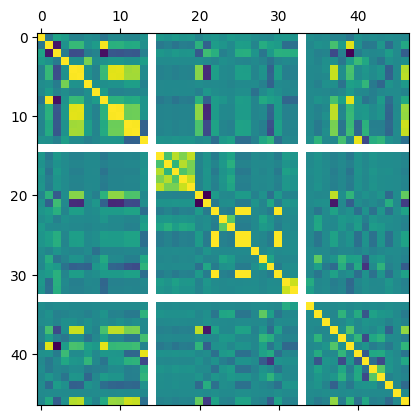

In [6]:
print(x_train.size)
plt.matshow(x_train.corr())
x_train.head()

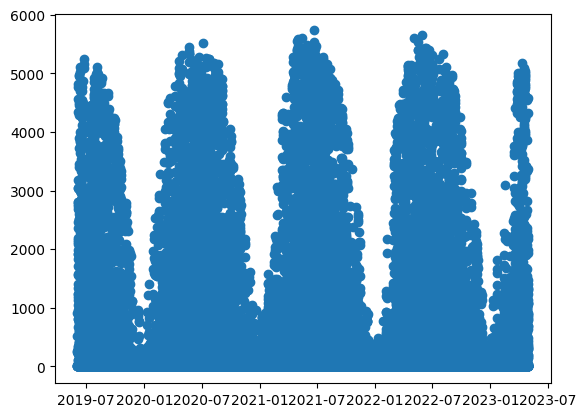

In [7]:
plt.scatter(x_train['date_forecast'], x_train['pv_measurement'])
plt.show()

In [8]:
stats = x_train.describe()
stats.loc['NaN'] = x_train.isna().sum()
stats

date_forecast  absolute_humidity_2m:gm3  \
count                       34061              34061.000000   
mean   2021-05-13 13:58:16.843897                  6.322345   
min           2019-06-02 22:00:00                  0.700000   
25%           2020-05-22 17:00:00                  4.200000   
50%           2021-05-12 12:00:00                  5.800000   
75%           2022-05-02 07:00:00                  8.300000   
max           2023-04-30 23:00:00                 17.500000   
std                           NaN                  2.801960   
NaN                             0                  0.000000   

       air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_energy_1h:J  \
count         34061.000000          34061.000000           3.406100e+04   
mean              1.253279           2228.493408           5.526699e+05   
min               1.145000              0.000000           0.000000e+00   
25%               1.228000            227.899994           0.000000e+00   
50%               1.251000           1368.400024           1.537820e+04   
75%               1.277000           3113.300049           9.042897e+05   
max               1.427000          12328.500000           3.004693e+06   
std               0.037245           2547.902100           8.503473e+05   
NaN               0.000000              0.000000           0.000000e+00   

       clear_sky_rad:W  cloud_base_agl:m  dew_or_rime:idx  dew_point_2m:K  \
count     34061.000000      34061.000000     34061.000000    34061.000000   
mean        153.522400       1533.308838         0.021109      275.971649   
min           0.000000          0.000000        -1.000000      250.899994   
25%           0.000000        435.399994         0.000000      271.299988   
50%           0.000000        980.900024         0.000000      276.000000   
75%         249.699997       1894.400024         0.000000      281.299988   
max         834.799988      11688.700195         1.000000      293.799988   
std         236.807220       1772.653687         0.195653        6.896890   
NaN           0.000000          0.000000         0.000000        0.000000   

       diffuse_rad:W  ...  sun_elevation:d  super_cooled_liquid_water:kgm2  \
count   34061.000000  ...     34061.000000                    34061.000000   
mean       42.171734  ...        -0.047865                        0.055703   
min         0.000000  ...       -49.941002                        0.000000   
25%         0.000000  ...       -17.025000                        0.000000   
50%         0.000000  ...        -0.051000                        0.000000   
75%        71.199997  ...        16.985001                        0.100000   
max       336.700012  ...        49.880001                        1.400000   
std        62.958401  ...        24.194777                        0.109655   
NaN         0.000000  ...         0.000000                        0.000000   

        t_1000hPa:K  total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
count  34061.000000         34061.000000  34061.000000       34061.000000   
mean     279.936676            74.234734  32579.109375           3.061046   
min      258.899994             0.000000    154.300003           0.000000   
25%      275.200012            53.099998  15583.599609           1.700000   
50%      279.500000            95.199997  36456.199219           2.700000   
75%      284.600006           100.000000  48313.601562           4.100000   
max      303.299988           100.000000  71349.898438          15.200000   
std        6.669673            34.467426  18114.937500           1.793841   
NaN        0.000000             0.000000      0.000000           0.000000   

       wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  \
count         34061.000000         34061.000000             34061.000000   
mean              0.655333             0.567538                 0.000021   
min              -7.300000            -9.300000                -0.000000   
25%        

[[-1.80827753e-01  1.93452316e-01 -2.79392699e-02 ...  1.25840015e-01
  -1.76557039e-03 -2.67959898e-01]
 [ 1.49946559e-01 -2.57200117e-01  2.65343433e-02 ...  1.05364906e-02
  -1.05244419e-02 -3.69190449e-02]
 [-2.10817771e-01  4.13015727e-02  7.07970878e-02 ...  3.98329698e-02
  -5.26905166e-03  1.23726414e-01]
 ...
 [-1.26919590e-04 -4.01634000e-03  1.45080258e-05 ... -3.88504745e-05
   3.51238280e-06  3.06776516e-05]
 [-0.00000000e+00 -2.77555756e-17  1.11562249e-16 ... -2.77555756e-17
   4.51028104e-17  1.11022302e-16]
 [-0.00000000e+00  3.08780779e-16 -9.62125232e-17 ... -1.66533454e-16
   2.77555756e-17 -5.55111512e-17]]


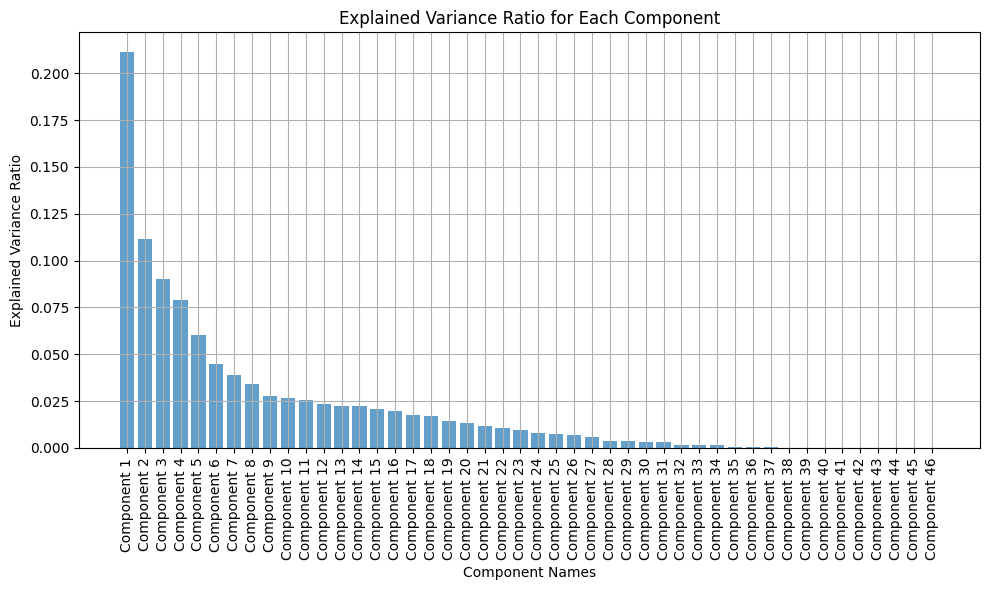

In [9]:
scaler = StandardScaler()
date_forecast = x_train['date_forecast']
x_train.drop(columns=['date_forecast'], inplace=True)
x_train_standardized = scaler.fit_transform(x_train)
comps = 15
pca = PCA()
pca.fit_transform(x_train_standardized)
explained_variance_ratio = pca.explained_variance_ratio_
principal_components = pca.components_
print(principal_components)
# Create a bar plot for explained variance ratios
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')

# Set custom labels for the x-axis based on PCA component order
num_components = len(explained_variance_ratio)
variable_names = [f'Component {i+1}' for i in range(num_components)]

plt.xticks(range(1, num_components + 1), variable_names, rotation=90)  # Use rotation for better readability

plt.xlabel('Component Names')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Component')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
x_train.head()

absolute_humidity_2m:gm3  air_density_2m:kgm3  ceiling_height_agl:m  \
4394                       7.7                1.230           1744.900024   
4395                       7.7                1.225           1703.599976   
4396                       7.7                1.221           1668.099976   
4397                       8.2                1.218           1388.400024   
4398                       8.8                1.219           1108.500000   

      clear_sky_energy_1h:J  clear_sky_rad:W  cloud_base_agl:m  \
4394               0.000000              0.0       1744.900024   
4395               0.000000              0.0       1703.599976   
4396               0.000000              0.0       1668.099976   
4397               0.000000              0.0       1388.400024   
4398            6546.899902              9.8       1108.500000   

      dew_or_rime:idx  dew_point_2m:K  diffuse_rad:W  diffuse_rad_1h:J  ...  \
4394              0.0      280.299988            0.0          0.000000  ...   
4395              0.0      280.299988            0.0          0.000000  ...   
4396              0.0      280.200012            0.0          0.000000  ...   
4397              0.0      281.299988            0.0          0.000000  ...   
4398              0.0      282.299988            4.3       7743.299805  ...   

      sun_elevation:d  super_cooled_liquid_water:kgm2  t_1000hPa:K  \
4394           -3.202                             0.0   285.899994   
4395           -4.393                             0.0   286.799988   
4396           -3.910                             0.0   287.000000   
4397           -1.986                             0.0   286.899994   
4398            1.401                             0.0   286.500000   

      total_cloud_cover:p  visibility:m  wind_speed_10m:ms  \
4394                100.0  39640.101562                3.7   
4395                100.0  41699.898438                3.5   
4396                100.0  20473.000000                3.2   
4397                100.0   2104.600098                2.8   
4398                100.0   2681.600098                2.7   

      wind_speed_u_10m:ms  wind_speed_v_10m:ms  wind_speed_w_1000hPa:ms  \
4394                 -3.6                 -0.8                     -0.0   
4395                 -3.5                  0.0                     -0.0   
4396                 -3.1                  0.7                     -0.0   
4397                 -2.7                  0.8                     -0.0   
4398                 -2.5                  1.0                     -0.0   

      pv_measurement  
4394            0.00  
4395            0.00  
4396            0.00  
4397            0.00  
4398           19.36  

[5 rows x 46 columns]

In [11]:
x_train['date_forecast'] = date_forecast

model = AutoTS(
    forecast_length=1600,
    frequency='infer',
    prediction_interval=0.95,
    ensemble='simple,
    #models_mode='deep',
    model_list = 'fast',# or ['ARIMA','ETS']
    max_generations=5 if start_fresh else 0,
    num_validations=2 if start_fresh else 0,
    no_negatives=True,
    n_jobs='12',
    validation_method="backwards",
    no_negatives=True
)

if not start_fresh:
    model = model.import_template(f"template_{location}_{version}.csv", method='only') # method='add on'
model = model.fit(x_train, date_col='date_forecast', value_col='pv_measurement', result_file=f"result_{location}_{version}.csv")

Data frequency is: H, used frequency is: H
Model Number: 1 with model AverageValueNaive in generation 0 of 5
Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Model Number: 4 with model DatepartRegression in generation 0 of 5
Model Number: 5 with model DatepartRegression in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iter

Model Number: 6 with model DatepartRegression in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 5
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 5
Model Number: 9 with model ETS in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 10 with model GLM in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 11 with model GLM in generation 0 of 5
Model Number: 12 with model GLS in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 13 with model GLS in generation 0 of 5
Model Number: 14 with model LastValueNaive in generation 0 of 5
Model Number: 15 with model LastValueNaive in generation 0 of 5
Model Number: 16 with model LastValueNaive in generation 0 of 5
Model Number: 17 with model LastValueNaive in generation 0 of 5
Model Number: 18 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use

Model Number: 19 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()


Model Number: 20 with model SeasonalNaive in generation 0 of 5
Model Number: 21 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 21 in generation 0: VAR
Model Number: 22 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 22 in generation 0: VAR
Model Number: 23 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 23 in generation 0: VECM
Model Number: 24 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 24 in generation 0: VECM
Model Number: 25 with model WindowRegression in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fill

Model Number: 26 with model ConstantNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\t

Model Number: 27 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 5
Model Number: 29 with model DatepartRegression in generation 0 of 5
Model Number: 30 with model ETS in generation 0 of 5
Model Number: 31 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 31 in generation 0: VECM
Model Number: 32 with model MultivariateMotif in generation 0 of 5
Model Number: 33 with model MultivariateMotif in generation 0 of 5
Model Number: 34 with model UnivariateMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 35 with model UnivariateMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 36 with model SectionalMotif in generation 0 of 5
Model Number: 37 with model SectionalMotif in generation 0 of 5
Model Number: 38 with model SeasonalNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 39 with model DatepartRegression in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 40 with model NVAR in generation 0 of 5
Model Number: 41 with model Cassandra in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 42 with model SeasonalityMotif in generation 0 of 5
Model Number: 43 with model ConstantNaive in generation 0 of 5
Model Number: 44 with model LastValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 45 with model AverageValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 46 with model GLS in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 47 with model SeasonalNaive in generation 0 of 5
Model Number: 48 with model GLM in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 48 in generation 0: GLM
Model Number: 49 with model ETS in generation 0 of 5
Model Number: 50 with model VAR in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with

Template Eval Error: ValueError('Only gave one variable to VAR') in model 50 in generation 0: VAR
Model Number: 51 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 51 in generation 0: VECM
Model Number: 52 with model WindowRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 52 in generation 0: WindowRegression
Model Number: 53 with model DatepartRegression in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() 

Model Number: 54 with model UnivariateMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 55 with model MultivariateMotif in generation 0 of 5
Model Number: 56 with model SectionalMotif in generation 0 of 5
Model Number: 57 with model NVAR in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Model Number: 58 with model MAR in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: ValueError('Shape of passed values is (406, 1), indices imply (1600, 1)') in model 58 in generation 0: MAR
Model Number: 59 with model RRVAR in generation 0 of 5
Model Number: 60 with model KalmanStateSpace in generation 0 of 5
Model Number: 61 with model MetricMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+10, tolerance: 3.477e+06
  model = cd_fast.enet_coordinate_descent(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame

Model Number: 62 with model Cassandra in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 62 in generation 0: Cassandra
Model Number: 63 with model SeasonalityMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 63 in generation 0: SeasonalityMotif
Model Number: 64 with model VAR in generation 0 of 5
Template Eval Error: IndexError('tuple index out of range') in model 64 in generation 0: VAR
Model Number: 65 with model KalmanStateSpace in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 66 with model GLM in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
c:\code\ntnu\semester9\ml_prosjekt\venv\

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 66 in generation 0: GLM
Model Number: 67 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 67 in generation 0: VAR
Model Number: 68 with model LastValueNaive in generation 0 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 68 in generation 0: LastValueNaive
Model Number: 69 with model MetricMotif in generation 0 of 5
Model Number: 70 with model GLM in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() i

Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 70 in generation 0: GLM
Model Number: 71 with model ConstantNaive in generation 0 of 5
Model Number: 72 with model VAR in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: ValueError('Only gave one variable to VAR') in model 72 in generation 0: VAR
Model Number: 73 with model LastValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 73 in generation 0: LastValueNaive
Model Number: 74 with model ConstantNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 75 with model UnivariateMotif in generation 0 of 5
Model Number: 76 with model VECM in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


Template Eval Error: ValueError('Only gave one variable to VECM') in model 76 in generation 0: VECM
Model Number: 77 with model LastValueNaive in generation 0 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 77 in generation 0: LastValueNaive
Model Number: 78 with model SeasonalityMotif in generation 0 of 5
Model Number: 79 with model NVAR in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 79 in generation 0: NVAR
Model Number: 80 with model LastValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 80 in generation 0: LastValueNaive
Model Number: 81 with model VECM in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna wit

Template Eval Error: ValueError('Only gave one variable to VECM') in model 81 in generation 0: VECM
Model Number: 82 with model DatepartRegression in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 82 in generation 0: DatepartRegression
Model Number: 83 with model Cassandra in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use

Template Eval Error: ValueError('Only gave one variable to VAR') in model 83 in generation 0: Cassandra
Model Number: 84 with model RRVAR in generation 0 of 5
Model Number: 85 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 85 in generation 0: VAR
Model Number: 86 with model MAR in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

Template Eval Error: ValueError('Shape of passed values is (406, 1), indices imply (1600, 1)') in model 86 in generation 0: MAR
Model Number: 87 with model SectionalMotif in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 87 in generation 0: SectionalMotif
Model Number: 88 with model LastValueNaive in generation 0 of 5
Model Number: 89 with model DatepartRegression in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Model Number: 90 with model Cassandra in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:437: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  trs_df.groupby(self.categorical_groups, axis=1)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future ve

Model Number: 91 with model LastValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 91 in generation 0: LastValueNaive
Model Number: 92 with model GLS in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a futur

Model Number: 93 with model Cassandra in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\code\ntnu\semester9

Model Number: 94 with model ConstantNaive in generation 0 of 5
Model Number: 95 with model MultivariateMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() 

Model Number: 96 with model ConstantNaive in generation 0 of 5
Model Number: 97 with model SeasonalityMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()


Model Number: 98 with model MetricMotif in generation 0 of 5
Model Number: 99 with model KalmanStateSpace in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

Model Number: 100 with model KalmanStateSpace in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 101 with model SectionalMotif in generation 0 of 5
Model Number: 102 with model ConstantNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 103 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 103 in generation 0: VECM
Model Number: 104 with model GLM in generation 0 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 104 in generation 0: GLM
Model Number: 105 with model Cassandra in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: KeyError("[Timestamp('2019-06-02 23:00:00'), Timestamp('2019-06-03 00:00:00'), Timestamp('2019-06-03 01:00:00'), Timestamp('2019-06-03 02:00:00'), Timestamp('2019-06-03 03:00:00'), Timestamp('2019-06-03 04:00:00'), Timestamp('2019-06-03 05:00:00'), Timestamp('2019-06-03 06:00:00'), Timestamp('2019-06-03 07:00:00'), Timestamp('2019-06-03 08:00:00'), Timestamp('2019-06-03 09:00:00'), Timestamp('2019-06-03 10:00:00'), Timestamp('2019-06-03 11:00:00'), Timestamp('2019-06-03 12:00:00'), Timestamp('2019-06-03 13:00:00'), Timestamp('2019-06-03 14:00:00'), Timestamp('2019-06-03 15:00:00'), Timestamp('2019-06-03 16:00:00'), Timestamp('2019-06-03 17:00:00'), Timestamp('2019-06-03 18:00:00'), Timestamp('2019-06-03 19:00:00'), Timestamp('2019-06-03 20:00:00'), Timestamp('2019-06-03 21:00:00'), Timestamp('2019-06-03 23:00:00'), Timestamp('2019-06-04 00:00:00'), Timestamp('2019-06-04 01:00:00'), Timestamp('2019-06-04 02:00:00'), Timestamp('2019-06-04 03:00:00'), Timestamp('2019-

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()


Model Number: 108 with model MetricMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 109 with model LastValueNaive in generation 0 of 5
Model Number: 110 with model UnivariateMotif in generation 0 of 5
Model Number: 111 with model VAR in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Template Eval Error: ValueError('Only gave one variable to VAR') in model 111 in generation 0: VAR
Model Number: 112 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 112 in generation 0: VECM
Model Number: 113 with model SeasonalityMotif in generation 0 of 5
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 113 in generation 0: SeasonalityMotif

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in


Model Number: 114 with model VECM in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VECM') in model 114 in generation 0: VECM
Model Number: 115 with model ETS in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on pv_measurement with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on pv_measurement_lltmicro with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 116 with model RRVAR in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_val

Model Number: 117 with model DatepartRegression in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 117 in generation 0: DatepartRegression
Model Number: 118 with model DatepartRegression in generation 0 of 5
Model Number: 119 with model SectionalMotif in generation 0 of 5
Model Number: 120 with model Cassandra in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 120 in generation 0: Cassandra
Model Number: 121 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 121 in generation 0: DatepartRegression
Model Number: 122 with model LastValueNaive in generation 0 of 5
Model Number: 123 with model NVAR in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 123 in generation 0: NVAR
Model Number: 124 with model AverageValueNaive in generation 0 of 5
Model Number: 125 with model LastValueNaive in generation 0 of 5
Model Number: 126 with model LastValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version

Model Number: 127 with model MultivariateMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method

Model Number: 128 with model VAR in generation 0 of 5
Template Eval Error: ValueError('Only gave one variable to VAR') in model 128 in generation 0: VAR
Model Number: 129 with model GLM in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 130 with model SeasonalityMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 131 with model SeasonalityMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 132 with model KalmanStateSpace in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

Model Number: 133 with model ETS in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 134 with model Cassandra in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future err

Model Number: 135 with model LastValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 136 with model ConstantNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() i

Model Number: 137 with model GLM in generation 0 of 5
Model Number: 138 with model WindowRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 138 in generation 0: WindowRegression
Model Number: 139 with model MetricMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 139 in generation 0: MetricMotif
Model Number: 140 with model LastValueNaive in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

Model Number: 141 with model MetricMotif in generation 0 of 5
Model Number: 142 with model ConstantNaive in generation 0 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PctChangeTransformer', '1': 'RobustScaler', '2': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 142 in generation 0: ConstantNaive
Model Number: 143 with model MetricMotif in generation 0 of 5
Model Number: 144 with model GLM in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return

Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 144 in generation 0: GLM
Model Number: 145 with model AverageValueNaive in generation 0 of 5
Model Number: 146 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 146 in generation 0: MetricMotif
Model Number: 147 with model MultivariateMotif in generation 0 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a futu

New Generation: 1 of 5
Model Number: 148 with model DatepartRegression in generation 1 of 5
Model Number: 149 with model LastValueNaive in generation 1 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'mean', 'transformations': {'0': 'AlignLastValue', '1': 'QuantileTransformer', '2': 'EWMAFilter'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {'span': 364}}}. fail_on_forecast_nan=True") in model 149 in generation 1: LastValueNaive
Model Number: 150 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


Model Number: 151 with model SeasonalityMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 152 with model LastValueNaive in generation 1 of 5
Model Number: 153 with model GLM in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 154 with model UnivariateMotif in generation 1 of 5
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 154 in generation 1: UnivariateMotif
Model Number: 155 with model UnivariateMotif in generation 1 of 5
Model Number: 156 with model SeasonalityMotif in generation 1 of 5
Model Number: 157 with model ETS in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.

Model Number: 158 with model LastValueNaive in generation 1 of 5
Model Number: 159 with model RRVAR in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()


Model Number: 160 with model GLM in generation 1 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 160 in generation 1: GLM
Model Number: 161 with model Cassandra in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pand

Model Number: 162 with model RRVAR in generation 1 of 5
Model Number: 163 with model NVAR in generation 1 of 5
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 163 in generation 1: NVAR
Model Number: 164 with model ConstantNaive in generation 1 of 5
Model Number: 165 with model LastValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 165 in generation 1: LastValueNaive
Model Number: 166 with model DatepartRegression in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 167 with model SectionalMotif in generation 1 of 5
Model Number: 168 with model UnivariateMotif in generation 1 of 5
Model Number: 169 with model ETS in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 170 with model SeasonalityMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 171 with model RRVAR in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 172 with model DatepartRegression in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 173 with model DatepartRegression in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3876: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning

Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 173 in generation 1: DatepartRegression
Model Number: 174 with model WindowRegression in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 175 with model Cassandra in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\code\ntnu\semester9

Template Eval Error: ValueError('Only gave one variable to VAR') in model 175 in generation 1: Cassandra
Model Number: 176 with model NVAR in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


Model Number: 177 with model ConstantNaive in generation 1 of 5
Model Number: 178 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.

Model Number: 179 with model DatepartRegression in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(


Model Number: 180 with model SeasonalityMotif in generation 1 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 180 in generation 1: SeasonalityMotif
Model Number: 181 with model SeasonalityMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 181 in generation 1: SeasonalityMotif
Model Number: 182 with model MetricMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
c:\code\ntnu\semester9\ml_prosjekt\ven

Model Number: 183 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 183 in generation 1: DatepartRegression
Model Number: 184 with model ETS in generation 1 of 5
Model Number: 185 with model LastValueNaive in generation 1 of 5
Model Number: 186 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

Model Number: 187 with model ETS in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() ins

Model Number: 188 with model AverageValueNaive in generation 1 of 5
Model Number: 189 with model AverageValueNaive in generation 1 of 5
Model Number: 190 with model MetricMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 191 with model SeasonalNaive in generation 1 of 5
Model Number: 192 with model SectionalMotif in generation 1 of 5
Model Number: 193 with model UnivariateMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 193 in generation 1: UnivariateMotif
Model Number: 194 with model SectionalMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 195 with model AverageValueNaive in generation 1 of 5
Model Number: 196 with model MultivariateMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 197 with model UnivariateMotif in generation 1 of 5
Model Number: 198 with model SectionalMotif in generation 1 of 5
Model Number: 199 with model Cassandra in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3876: FutureWarning: DataFrame.fillna

Model Number: 200 with model AverageValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 201 with model DatepartRegression in generation 1 of 5
Model Number: 202 with model LastValueNaive in generation 1 of 5
Model Number: 203 with model SeasonalityMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 204 with model SeasonalityMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 205 with model MetricMotif in generation 1 of 5
Model Number: 206 with model ConstantNaive in generation 1 of 5
Model Number: 207 with model MetricMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 208 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 209 with model SeasonalNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 210 with model SeasonalityMotif in generation 1 of 5
Model Number: 211 with model DatepartRegression in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 212 with model SectionalMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 213 with model SeasonalityMotif in generation 1 of 5
Model Number: 214 with model RRVAR in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 215 with model ConstantNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


Model Number: 216 with model GLM in generation 1 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 216 in generation 1: GLM
Model Number: 217 with model KalmanStateSpace in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 218 with model KalmanStateSpace in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 219 with model UnivariateMotif in generation 1 of 5
Model Number: 220 with model ETS in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Model Number: 221 with model GLM in generation 1 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 221 in generation 1: GLM
Model Number: 222 with model DatepartRegression in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a futu

Model Number: 223 with model GLM in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 224 with model GLS in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 225 with model SectionalMotif in generation 1 of 5
Model Number: 226 with model UnivariateMotif in generation 1 of 5
Model Number: 227 with model RRVAR in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is 

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'PctChangeTransformer', '1': 'DatepartRegression', '2': 'AlignLastValue', '3': 'PositiveShift', '4': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {'regression_model': {'model': 'RandomForest', 'model_params': {'n_estimators': 100, 'min_samples_leaf': 1, 'bootstrap': True}}, 'datepart_method': 'simple_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}, 'holiday_countries_used': False}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {}, '4': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 227 in generation 1: 

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a f

Model Number: 230 with model SeasonalNaive in generation 1 of 5
Model Number: 231 with model GLM in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 231 in generation 1: GLM
Model Number: 232 with model LastValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 233 with model MetricMotif in generation 1 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 233 in generation 1: MetricMotif
Model Number: 234 with model AverageValueNaive in generation 1 of 5
Model Number: 235 with model SectionalMotif in generation 1 of 5
Model Number: 236 with model NVAR in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Model Number: 237 with model SeasonalNaive in generation 1 of 5
Model Number: 238 with model Cassandra in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompati

Model Number: 239 with model LastValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 240 with model ETS in generation 1 of 5
Model Number: 241 with model UnivariateMotif in generation 1 of 5
Model Number: 242 with model GLM in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() 

Model Number: 243 with model SectionalMotif in generation 1 of 5
Model Number: 244 with model SectionalMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 245 with model DatepartRegression in generation 1 of 5
Model Number: 246 with model UnivariateMotif in generation 1 of 5
Model Number: 247 with model SectionalMotif in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 247 in generation 1: SectionalMotif
Model Number: 248 with model WindowRegression in generation 1 of 5
Model Number: 249 with model ConstantNaive in generation 1 of 5
Model Number: 250 with model DatepartRegression in generation 1 of 5
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 250 in generation 1: DatepartRegression
Model Number: 251 with model LastValueNaive in generation 1 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\c

Model Number: 252 with model DatepartRegression in generation 1 of 5
New Generation: 2 of 5
Model Number: 253 with model AverageValueNaive in generation 2 of 5
Model Number: 254 with model GLM in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 255 with model RRVAR in generation 2 of 5
Model Number: 256 with model ETS in generation 2 of 5
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on pv_measurement with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 257 with model WindowRegression in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 258 with model SeasonalityMotif in generation 2 of 5
Model Number: 259 with model UnivariateMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 260 with model SeasonalityMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 261 with model RRVAR in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 262 with model GLS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 263 with model SeasonalityMotif in generation 2 of 5
Model Number: 264 with model SeasonalityMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 265 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated an

Model Number: 266 with model RRVAR in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 267 with model WindowRegression in generation 2 of 5
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 267 in generation 2: WindowRegression
Model Number: 268 with model GLM in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWar

Model Number: 269 with model NVAR in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3876: FutureWarning: DataFrame.fillna

Model Number: 270 with model DatepartRegression in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 270 in generation 2: DatepartRegression
Model Number: 271 with model WindowRegression in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRC

Model Number: 272 with model DatepartRegression in generation 2 of 5
Model Number: 273 with model DatepartRegression in generation 2 of 5
Model Number: 274 with model DatepartRegression in generation 2 of 5
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 274 in generation 2: DatepartRegression
Model Number: 275 with model ETS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 276 with model ConstantNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\decomposition\_fastica.py:576: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(meth

Template Eval Error: Exception('Transformer FastICA failed on inverse') in model 276 in generation 2: ConstantNaive
Model Number: 277 with model SeasonalNaive in generation 2 of 5
Model Number: 278 with model ETS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 279 with model UnivariateMotif in generation 2 of 5
Model Number: 280 with model UnivariateMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffi

Model Number: 281 with model NVAR in generation 2 of 5
Model Number: 282 with model ConstantNaive in generation 2 of 5
Model Number: 283 with model AverageValueNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3876: FutureWarning: DataFrame.fillna

Model Number: 284 with model ConstantNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: 

Model Number: 285 with model SectionalMotif in generation 2 of 5
Template Eval Error: ValueError('The number of observations (1) is too small; the covariance matrix is singular. For observations with 5 dimensions, at least 6 observations are required.') in model 285 in generation 2: SectionalMotif
Model Number: 286 with model SeasonalNaive in generation 2 of 5
Model Number: 287 with model MultivariateMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 288 with model UnivariateMotif in generation 2 of 5
Model Number: 289 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future err

Model Number: 290 with model ConstantNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: F

Model Number: 291 with model AverageValueNaive in generation 2 of 5
Model Number: 292 with model DatepartRegression in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 293 with model ETS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 294 with model GLM in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Model Number: 295 with model AverageValueNaive in generation 2 of 5
Model Number: 296 with model SeasonalityMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 297 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 298 with model UnivariateMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and w

Model Number: 299 with model SeasonalNaive in generation 2 of 5
Model Number: 300 with model MetricMotif in generation 2 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 300 in generation 2: MetricMotif
Model Number: 301 with model SeasonalityMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Template Eval Error: MemoryError((32674, 1600, 52), dtype('float64')) in model 301 in generation 2: SeasonalityMotif
Model Number: 302 with model ETS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 303 with model UnivariateMotif in generation 2 of 5
Model Number: 304 with model WindowRegression in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 305 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has

Model Number: 306 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\utils\extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, orde

Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 306 in generation 2: Cassandra
Model Number: 307 with model LastValueNaive in generation 2 of 5
Model Number: 308 with model SeasonalityMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Us

Model Number: 309 with model WindowRegression in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\t

Model Number: 310 with model RRVAR in generation 2 of 5
Model Number: 311 with model DatepartRegression in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 312 with model RRVAR in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby i

Model Number: 313 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pand

Model Number: 314 with model SectionalMotif in generation 2 of 5
Model Number: 315 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 315 in generation 2: DatepartRegression
Model Number: 316 with model DatepartRegression in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 317 with model GLM in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Model Number: 318 with model MetricMotif in generation 2 of 5
Model Number: 319 with model KalmanStateSpace in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 320 with model SectionalMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\fast_kalman.py:858: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 321 with model UnivariateMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3876: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: Da

Model Number: 322 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' h

Model Number: 323 with model LastValueNaive in generation 2 of 5
Model Number: 324 with model LastValueNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 325 with model NVAR in generation 2 of 5
Model Number: 326 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 327 with model SectionalMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 328 with model GLM in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 329 with model SeasonalNaive in generation 2 of 5
Model Number: 330 with model DatepartRegression in generation 2 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 330 in generation 2: DatepartRegression
Model Number: 331 with model ETS in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 332 with model UnivariateMotif in generation 2 of 5
Model Number: 333 with model LastValueNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Model Number: 334 with model RRVAR in generation 2 of 5
Model Number: 335 with model WindowRegression in generation 2 of 5
Model Number: 336 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future err

Model Number: 337 with model GLM in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 337 in generation 2: GLM
Model Number: 338 with model MultivariateMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 339 with model ETS in generation 2 of 5
Model Number: 340 with model UnivariateMotif in generation 2 of 5
Model Number: 341 with model MetricMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

Model Number: 342 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 342 in generation 2: DatepartRegression
Model Number: 343 with model KalmanStateSpace in generation 2 of 5
Model Number: 344 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future err

Model Number: 345 with model SectionalMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 346 with model KalmanStateSpace in generation 2 of 5
Model Number: 347 with model SeasonalNaive in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 348 with model AverageValueNaive in generation 2 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 348 in generation 2: AverageValueNaive
Model Number: 349 with model SectionalMotif in generation 2 of 5
Model Number: 350 with model UnivariateMotif in generation 2 of 5
Model Number: 351 with model SeasonalityMotif in generation 2 of 5
Model Number: 352 with model SeasonalityMotif in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in 

Model Number: 353 with model SeasonalityMotif in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 353 in generation 2: SeasonalityMotif
Model Number: 354 with model Cassandra in generation 2 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: Future

Model Number: 355 with model UnivariateMotif in generation 2 of 5
Model Number: 356 with model RRVAR in generation 2 of 5
Model Number: 357 with model SectionalMotif in generation 2 of 5
Template Eval Error: LinAlgError('Singular matrix') in model 357 in generation 2: SectionalMotif


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


New Generation: 3 of 5
Model Number: 358 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 359 with model GLS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 360 with model MultivariateMotif in generation 3 of 5
Model Number: 361 with model WindowRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 362 with model MultivariateMotif in generation 3 of 5
Model Number: 363 with model SeasonalityMotif in generation 3 of 5
Model Number: 364 with model DatepartRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 365 with model Cassandra in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 366 with model ConstantNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pand

Model Number: 367 with model MetricMotif in generation 3 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 367 in generation 3: MetricMotif
Model Number: 368 with model DatepartRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 369 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 369 in generation 3: DatepartRegression
Model Number: 370 with model MetricMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 370 in generation 3: MetricMotif
Model Number: 371 with model SectionalMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt

Model Number: 372 with model RRVAR in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 373 with model Cassandra in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.2656e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

Model Number: 374 with model ETS in generation 3 of 5
Model Number: 375 with model DatepartRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 375 in generation 3: DatepartRegression
Model Number: 376 with model ETS in generation 3 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 376 in generation 3: ETS
Model Number: 377 with model SeasonalityMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 378 with model ETS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 379 with model LastValueNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and wi

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'akima', 'transformations': {'0': 'ClipOutliers', '1': 'KalmanSmoothing', '2': 'PctChangeTransformer'}, 'transformation_params': {'0': {'method': 'remove', 'std_threshold': 2, 'fillna': 'ffill'}, '1': {'model_name': 'dynamic linear', 'state_transition': [[1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0.6, 1], [0, 0, 1.3, 0]], 'process_noise': [[1.1, 0, 0, 0], [0, 1.2, 0, 0], [0, 0, 1.2, 0], [0, 0, 0, 0]], 'observation_model': [[1, 0, 1, 0]], 'observation_noise': 0.25, 'em_iter': 10}, '2': {}}}. fail_on_forecast_nan=True") in model 379 in generation 3: LastValueNaive
Model Number: 380 with model SectionalMotif in generation 3 of 5
Model Number: 381 with model WindowRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 381 in generation 3: WindowRegression
Model Number: 382 with model MultivariateMotif in generation 3 of 5
Model Number: 383 with model SectionalMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use

Model Number: 384 with model SeasonalityMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 385 with model ETS in generation 3 of 5
Model Number: 386 with model Cassandra in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 387 with model ConstantNaive in generation 3 of 5
Model Number: 388 with model UnivariateMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarni

Model Number: 389 with model UnivariateMotif in generation 3 of 5
Model Number: 390 with model SeasonalNaive in generation 3 of 5
Model Number: 391 with model SeasonalityMotif in generation 3 of 5
Model Number: 392 with model SectionalMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3876: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: Da

Model Number: 393 with model UnivariateMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 394 with model SeasonalityMotif in generation 3 of 5
Model Number: 395 with model ETS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a futur

Model Number: 396 with model GLM in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 396 in generation 3: GLM
Model Number: 397 with model AverageValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 397 in generation 3: AverageValueNaive
Model Number: 398 with model Cassandra in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is 

Model Number: 399 with model UnivariateMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 400 with model MetricMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:2402: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - self.means.shift(self.lag).values[..., None]).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 401 with model AverageValueNaive in generation 3 of 5
Model Number: 402 with model SeasonalityMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 403 with model UnivariateMotif in generation 3 of 5
Model Number: 404 with model AverageValueNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

Model Number: 405 with model SeasonalityMotif in generation 3 of 5
Model Number: 406 with model DatepartRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 407 with model GLS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Model Number: 408 with model ConstantNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: 

Model Number: 409 with model SeasonalNaive in generation 3 of 5
Model Number: 410 with model GLM in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 411 with model NVAR in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


Model Number: 412 with model GLM in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 413 with model GLM in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 414 with model GLS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 414 in generation 3: GLS
Model Number: 415 with model DatepartRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 416 with model RRVAR in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 417 with model UnivariateMotif in generation 3 of 5
Model Number: 418 with model DatepartRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 419 with model UnivariateMotif in generation 3 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 419 in generation 3: UnivariateMotif
Model Number: 420 with model Cassandra in generation 3 of 5
Model Number: 421 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and w

Model Number: 422 with model WindowRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 423 with model SectionalMotif in generation 3 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 423 in generation 3: SectionalMotif
Model Number: 424 with model SectionalMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\t

Model Number: 425 with model WindowRegression in generation 3 of 5
Model Number: 426 with model AverageValueNaive in generation 3 of 5
Model Number: 427 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 427 in generation 3: DatepartRegression
Model Number: 428 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 429 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 430 with model AverageValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 430 in generation 3: AverageValueNaive
Model Number: 431 with model MultivariateMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 432 with model SectionalMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 433 with model MultivariateMotif in generation 3 of 5
Model Number: 434 with model SeasonalityMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future v

Model Number: 435 with model SectionalMotif in generation 3 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'PctChangeTransformer', '1': 'MaxAbsScaler', '2': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 435 in generation 3: SectionalMotif
Model Number: 436 with model MetricMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return

Model Number: 437 with model SeasonalityMotif in generation 3 of 5
Model Number: 438 with model Cassandra in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 439 with model AverageValueNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is de

Model Number: 440 with model KalmanStateSpace in generation 3 of 5
Model Number: 441 with model RRVAR in generation 3 of 5
Model Number: 442 with model Cassandra in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 442 in generation 3: Cassandra
Model Number: 443 with model Cassandra in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.filln

Model Number: 444 with model LastValueNaive in generation 3 of 5
Model Number: 445 with model DatepartRegression in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 446 with model WindowRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 446 in generation 3: WindowRegression
Model Number: 447 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 448 with model SeasonalNaive in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 449 with model GLM in generation 3 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 449 in generation 3: GLM
Model Number: 450 with model ETS in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 451 with model UnivariateMotif in generation 3 of 5
Model Number: 452 with model SeasonalityMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_value

Model Number: 453 with model RRVAR in generation 3 of 5
Model Number: 454 with model Cassandra in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and w

Model Number: 455 with model WindowRegression in generation 3 of 5
Model Number: 456 with model UnivariateMotif in generation 3 of 5
Model Number: 457 with model SectionalMotif in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'piecewise_polynomial', 'transformations': {'0': 'AlignLastValue', '1': 'PowerTransformer', '2': 'DifferencedTransformer', '3': 'AnomalyRemoval'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.5, 'first_value_only': False}, '1': {}, '2': {}, '3': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.1, 'rolling_periods': 300, 'center': False}, 'fillna': 'linear', 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 7}}}}}}. fail_on_forecast_nan=True") in model 457 in generation 3: SectionalMotif
Model Number: 458 with model LastValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 458 in generation 3: LastValueNaive
Model Number: 459 with model Cassandra in generation 3 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5


Model Number: 460 with model SeasonalNaive in generation 3 of 5
Model Number: 461 with model LastValueNaive in generation 3 of 5
Model Number: 462 with model SectionalMotif in generation 3 of 5
New Generation: 4 of 5

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret


Model Number: 463 with model RRVAR in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 464 with model RRVAR in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 465 with model AverageValueNaive in generation 4 of 5
Model Number: 466 with model ConstantNaive in generation 4 of 5
Model Number: 467 with model GLM in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 468 with model SectionalMotif in generation 4 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 468 in generation 4: SectionalMotif
Model Number: 469 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 470 with model DatepartRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 470 in generation 4: DatepartRegression
Model Number: 471 with model WindowRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Model Number: 472 with model RRVAR in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_val

Model Number: 473 with model SectionalMotif in generation 4 of 5
Model Number: 474 with model DatepartRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 475 with model MultivariateMotif in generation 4 of 5
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 475 in generation 4: MultivariateMotif
Model Number: 476 with model UnivariateMotif in generation 4 of 5
Model Number: 477 with model Cassandra in generation 4 of 5
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 477 in generation 4: Cassandra
Model Number: 478 with model UnivariateMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 479 with model Cassandra in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.filln

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 479 in generation 4: Cassandra
Model Number: 480 with model WindowRegression in generation 4 of 5
Model Number: 481 with model MetricMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+10, tolerance: 3.477e+06
  model = cd_fast.enet_coordinate_descent(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame

Model Number: 482 with model RRVAR in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 483 with model SeasonalityMotif in generation 4 of 5
Model Number: 484 with model MetricMotif in generation 4 of 5
Model Number: 485 with model UnivariateMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, ini

Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 485 in generation 4: UnivariateMotif
Model Number: 486 with model WindowRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 486 in generation 4: WindowRegression
Model Number: 487 with model GLM in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 487 in generation 4: GLM
Model Number: 488 with model AverageValueNaive in generation 4 of 5
Model Number: 489 with model MultivariateMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\families\family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (

Model Number: 490 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 490 in generation 4: DatepartRegression
Model Number: 491 with model UnivariateMotif in generation 4 of 5
Model Number: 492 with model UnivariateMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() 

Model Number: 493 with model DatepartRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 494 with model DatepartRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_ids = range_arr[~diff_mask].fillna(method='ffill')  # [diff_mask]
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3876: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df - self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The de

Model Number: 495 with model ETS in generation 4 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 495 in generation 4: ETS
Model Number: 496 with model SectionalMotif in generation 4 of 5
Model Number: 497 with model WindowRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 498 with model SeasonalityMotif in generation 4 of 5
Model Number: 499 with model UnivariateMotif in generation 4 of 5
Model Number: 500 with model AverageValueNaive in generation 4 of 5
Model Number: 501 with model SeasonalityMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 502 with model SectionalMotif in generation 4 of 5
Model Number: 503 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\fast_kalman.py:858: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
c:\code\ntnu\semester9\ml_

Template Eval Error: ValueError('Model SeasonalNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 503 in generation 4: SeasonalNaive
Model Number: 504 with model SeasonalNaive in generation 4 of 5
Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 504 in generation 4: SeasonalNaive
Model Number: 505 with model SectionalMotif in generation 4 of 5
Model Number: 506 with model DatepartRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 507 with model SeasonalityMotif in generation 4 of 5
Model Number: 508 with model SeasonalityMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill(

Model Number: 509 with model NVAR in generation 4 of 5
Model Number: 510 with model SeasonalityMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 511 with model UnivariateMotif in generation 4 of 5
Model Number: 512 with model GLM in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 513 with model MetricMotif in generation 4 of 5
Model Number: 514 with model SectionalMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Model Number: 515 with model WindowRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\scipy\signal\_signaltools.py:1657: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\scipy\signal\_signaltools.py:1657: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


Model Number: 516 with model UnivariateMotif in generation 4 of 5
Model Number: 517 with model MetricMotif in generation 4 of 5
Model Number: 518 with model KalmanStateSpace in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Template Eval Error: Exception('Transformer FastICA failed on fit') in model 518 in generation 4: KalmanStateSpace
Model Number: 519 with model DatepartRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neighbors\_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 519 in generation 4: DatepartRegression
Model Number: 520 with model GLM in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 521 with model ETS in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 522 with model SeasonalityMotif in generation 4 of 5
Model Number: 523 with model NVAR in generation 4 of 5
Model Number: 524 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use 

Model Number: 525 with model ETS in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 526 with model UnivariateMotif in generation 4 of 5
Template Eval Error: ValueError('Unknown Distance Metric: kulsinski') in model 526 in generation 4: UnivariateMotif
Model Number: 527 with model SectionalMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 528 with model SectionalMotif in generation 4 of 5
Model Number: 529 with model RRVAR in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 529 in generation 4: RRVAR
Model Number: 530 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 531 with model RRVAR in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_val

Model Number: 532 with model Cassandra in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated 

Model Number: 533 with model GLS in generation 4 of 5
Model Number: 534 with model SectionalMotif in generation 4 of 5
Model Number: 535 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 536 with model GLS in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 537 with model UnivariateMotif in generation 4 of 5
Model Number: 538 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 538 in generation 4: SeasonalityMotif
Model Number: 539 with model DatepartRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 540 with model Cassandra in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 541 with model WindowRegression in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 541 in generation 4: WindowRegression
Model Number: 542 with model GLM in generation 4 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 542 in generation 4: GLM
Model Number: 543 with model RRVAR in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 544 with model Cassandra in generation 4 of 5
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 544 in generation 4: Cassandra
Model Number: 545 with model LastValueNaive in generation 4 of 5
Model Number: 546 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 546 in generation 4: DatepartRegression
Model Number: 547 with model AverageValueNaive in generation 4 of 5
Model Number: 548 with model SeasonalityMotif in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version

Model Number: 549 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 550 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:455: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_2 = df.groupby(level=0, axis=0).mean()


Model Number: 551 with model ConstantNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 552 with model LastValueNaive in generation 4 of 5
Model Number: 553 with model WindowRegression in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill

Model Number: 554 with model GLS in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 555 with model AverageValueNaive in generation 4 of 5
Model Number: 556 with model MultivariateMotif in generation 4 of 5
Model Number: 557 with model SectionalMotif in generation 4 of 5
Model Number: 558 with model AverageValueNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() 

Model Number: 559 with model SeasonalityMotif in generation 4 of 5
Model Number: 560 with model NVAR in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.f

Model Number: 561 with model WindowRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 561 in generation 4: WindowRegression
Model Number: 562 with model Cassandra in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 563 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 563 in generation 4: DatepartRegression
Model Number: 564 with model SeasonalityMotif in generation 4 of 5
Model Number: 565 with model Cassandra in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 566 with model RRVAR in generation 4 of 5
Model Number: 567 with model SeasonalNaive in generation 4 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


New Generation: 5 of 5
Model Number: 568 with model UnivariateMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\lib\function_base.py:553: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\imput

Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 568 in generation 5: UnivariateMotif
Model Number: 569 with model DatepartRegression in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 570 with model UnivariateMotif in generation 5 of 5
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 570 in generation 5: UnivariateMotif
Model Number: 571 with model UnivariateMotif in generation 5 of 5
Model Number: 572 with model ETS in generation 5 of 5
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on pv_measurement with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, wher

Model Number: 573 with model SectionalMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future v

Model Number: 574 with model WindowRegression in generation 5 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 574 in generation 5: WindowRegression
Model Number: 575 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 575 in generation 5: DatepartRegression
Model Number: 576 with model SeasonalNaive in generation 5 of 5
Model Number: 577 with model LastValueNaive in generation 5 of 5
Model Number: 578 with model AverageValueNaive in generation 5 of 5
Model Number: 579 with model ETS in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 580 with model SeasonalityMotif in generation 5 of 5
Model Number: 581 with model AverageValueNaive in generation 5 of 5
Model Number: 582 with model SeasonalityMotif in generation 5 of 5
Model Number: 583 with model RRVAR in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill(

Model Number: 584 with model DatepartRegression in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 585 with model GLM in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 586 with model Cassandra in generation 5 of 5
Template Eval Error: Exception('Transformer PCA failed on fit') in model 586 in generation 5: Cassandra
Model Number: 587 with model SectionalMotif in generation 5 of 5
Model Number: 588 with model MetricMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 588 in generation 5: MetricMotif
Model Number: 589 with model DatepartRegression in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 590 with model SeasonalityMotif in generation 5 of 5
Model Number: 591 with model SeasonalityMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

Model Number: 592 with model RRVAR in generation 5 of 5
Model Number: 593 with model SectionalMotif in generation 5 of 5
Model Number: 594 with model ConstantNaive in generation 5 of 5
Model Number: 595 with model RRVAR in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 596 with model RRVAR in generation 5 of 5
Model Number: 597 with model SeasonalNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:2402: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - self.means.shift(self.lag).values[..., None]).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


Model Number: 598 with model GLM in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Model Number: 599 with model WindowRegression in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 599 in generation 5: WindowRegression
Model Number: 600 with model AverageValueNaive in generation 5 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 600 in generation 5: AverageValueNaive
Model Number: 601 with model SectionalMotif in generation 5 of 5
Model Number: 602 with model MultivariateMotif in generation 5 of 5
Model Number: 603 with model ConstantNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 604 with model SeasonalityMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Model Number: 605 with model GLS in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 606 with model Cassandra in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is 

Model Number: 607 with model WindowRegression in generation 5 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 607 in generation 5: WindowRegression
Model Number: 608 with model NVAR in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3886: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df + self.lvlshft.reindex(index=df.index, columns=df.columns).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\au

Model Number: 609 with model SeasonalNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()


Model Number: 610 with model SectionalMotif in generation 5 of 5
Model Number: 611 with model ETS in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Template Eval Error: MemoryError((32674, 32674, 52), dtype('float64')) in model 611 in generation 5: ETS
Model Number: 612 with model DatepartRegression in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 613 with model RRVAR in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_val

Model Number: 614 with model MetricMotif in generation 5 of 5
Model Number: 615 with model SectionalMotif in generation 5 of 5
Model Number: 616 with model AverageValueNaive in generation 5 of 5
Model Number: 617 with model UnivariateMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 617 in generation 5: UnivariateMotif
Model Number: 618 with model MultivariateMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. U

Model Number: 619 with model SectionalMotif in generation 5 of 5
Model Number: 620 with model WindowRegression in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of

Model Number: 621 with model MetricMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 622 with model AverageValueNaive in generation 5 of 5
Model Number: 623 with model ETS in generation 5 of 5
Model Number: 624 with model SeasonalNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:455: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_2

Model Number: 625 with model RRVAR in generation 5 of 5
Model Number: 626 with model RRVAR in generation 5 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 626 in generation 5: RRVAR


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")


Model Number: 627 with model ConstantNaive in generation 5 of 5
Model Number: 628 with model Cassandra in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3804: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff_smoothed = diff_abs.where(diff_mask_0, np.nan).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:3817: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use ob

Model Number: 629 with model MultivariateMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and 

Model Number: 630 with model Cassandra in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and w

Model Number: 631 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 631 in generation 5: DatepartRegression
Model Number: 632 with model SectionalMotif in generation 5 of 5
Model Number: 633 with model MultivariateMotif in generation 5 of 5
Model Number: 634 with model SeasonalNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:455: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_2 = df.groupby(level=0, axis=0).mean()


Model Number: 635 with model KalmanStateSpace in generation 5 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 635 in generation 5: KalmanStateSpace
Model Number: 636 with model DatepartRegression in generation 5 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 636 in generation 5: DatepartRegression
Model Number: 637 with model SeasonalNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'StandardScaler', '1': 'PowerTransformer', '2': 'MeanDifference'}, 'transformation_params': {'0': {}, '1': {}, '2': {}}}. fail_on_forecast_nan=True") in model 637 in generation 5: SeasonalNaive
Model Number: 638 with model SectionalMotif in generation 5 of 5
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 638 in generation 5: SectionalMotif
Model Number: 639 with model SeasonalityMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


Model Number: 640 with model SeasonalityMotif in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


Model Number: 641 with model MultivariateMotif in generation 5 of 5
Model Number: 642 with model UnivariateMotif in generation 5 of 5
Model Number: 643 with model LastValueNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 644 with model DatepartRegression in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 645 with model RRVAR in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


Model Number: 646 with model UnivariateMotif in generation 5 of 5
Model Number: 647 with model UnivariateMotif in generation 5 of 5
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 647 in generation 5: UnivariateMotif
Model Number: 648 with model AverageValueNaive in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

Model Number: 649 with model DatepartRegression in generation 5 of 5
Model Number: 650 with model Cassandra in generation 5 of 5


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1442: FutureWarning: The 'fill_method' and 'limit' keywords in DataFrame.pct_change are deprecated and will be removed in a future version. Call ffill before calling pct_change instead.
  df = df.pct_change(periods=1, fill_method="ffill").fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecat

Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'KalmanSmoothing', '1': 'PctChangeTransformer', '2': 'AnomalyRemoval'}, 'transformation_params': {'0': {'model_name': 'local linear stochastic seasonal dummy', 'state_transition': [[1, 0, 0, 0], [0, -1, -1, -1], [0, 1, 0, 0], [0, 0, 1, 0]], 'process_noise': [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], 'observation_model': [[1, 1, 0, 0]], 'observation_noise': 0.25, 'em_iter': 10}, '1': {}, '2': {'method': 'LOF', 'method_params': {'contamination': 0.05, 'n_neighbors': 3, 'metric': 'minkowski'}, 'fillna': 'ffill', 'transform_dict': {'fillna': 'pad', 'transformations': {'0': 'AlignLastValue', '1': 'IntermittentOccurrence'}, 'transformation_params': {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.2, 'first_value_only': False}, '1': {'center': 'mean'}}}}}}. fail_on_forecast_nan=True") in model 650 in generation 5: Cassandra
Model Numb

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


TotalRuntime missing in 6!
Validation Round: 1
Model Number: 1 of 98 with model SeasonalityMotif for Validation 1
📈 1 - SeasonalityMotif with avg smape 34.49: 
Model Number: 2 of 98 with model UnivariateMotif for Validation 1
2 - UnivariateMotif with avg smape 182.26: 
Model Number: 3 of 98 with model SeasonalityMotif for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

📈 3 - SeasonalityMotif with avg smape 33.57: 
Model Number: 4 of 98 with model SeasonalityMotif for Validation 1
4 - SeasonalityMotif with avg smape 35.43: 
Model Number: 5 of 98 with model SeasonalityMotif for Validation 1
5 - SeasonalityMotif with avg smape 34.49: 
Model Number: 6 of 98 with model SeasonalityMotif for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv

6 - SeasonalityMotif with avg smape 34.49: 
Model Number: 7 of 98 with model SeasonalityMotif for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


7 - SeasonalityMotif with avg smape 118.53: 
Model Number: 8 of 98 with model UnivariateMotif for Validation 1
8 - UnivariateMotif with avg smape 111.73: 
Model Number: 9 of 98 with model UnivariateMotif for Validation 1
9 - UnivariateMotif with avg smape 75.15: 
Model Number: 10 of 98 with model UnivariateMotif for Validation 1
10 - UnivariateMotif with avg smape 175.14: 
Model Number: 11 of 98 with model UnivariateMotif for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

11 - UnivariateMotif with avg smape 75.15: 
Model Number: 12 of 98 with model SectionalMotif for Validation 1
12 - SectionalMotif with avg smape 165.67: 
Model Number: 13 of 98 with model DatepartRegression for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

13 - DatepartRegression with avg smape 90.54: 
Model Number: 14 of 98 with model DatepartRegression for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

14 - DatepartRegression with avg smape 90.54: 
Model Number: 15 of 98 with model DatepartRegression for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 15 - DatepartRegression with avg smape 32.02: 
Model Number: 16 of 98 with model DatepartRegression for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 16 - DatepartRegression with avg smape 30.97: 
Model Number: 17 of 98 with model SectionalMotif for Validation 1
17 - SectionalMotif with avg smape 71.0: 
Model Number: 18 of 98 with model DatepartRegression for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

18 - DatepartRegression with avg smape 32.04: 
Model Number: 19 of 98 with model DatepartRegression for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 19 - DatepartRegression with avg smape 30.34: 
Model Number: 20 of 98 with model UnivariateMotif for Validation 1
📈 20 - UnivariateMotif with avg smape 29.64: 
Model Number: 21 of 98 with model SectionalMotif for Validation 1
21 - SectionalMotif with avg smape 64.83: 
Model Number: 22 of 98 with model MultivariateMotif for Validation 1
22 - MultivariateMotif with avg smape 174.24: 
Model Number: 23 of 98 with model SectionalMotif for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

23 - SectionalMotif with avg smape 34.82: 
Model Number: 24 of 98 with model SectionalMotif for Validation 1
24 - SectionalMotif with avg smape 31.61: 
Model Number: 25 of 98 with model MetricMotif for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


25 - MetricMotif with avg smape 165.67: 
Model Number: 26 of 98 with model SectionalMotif for Validation 1
26 - SectionalMotif with avg smape 51.02: 
Model Number: 27 of 98 with model MultivariateMotif for Validation 1
27 - MultivariateMotif with avg smape 174.13: 
Model Number: 28 of 98 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

28 - SeasonalNaive with avg smape 44.44: 
Model Number: 29 of 98 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


29 - SeasonalNaive with avg smape 44.44: 
Model Number: 30 of 98 with model SeasonalNaive for Validation 1
30 - SeasonalNaive with avg smape 44.44: 
Model Number: 31 of 98 with model MultivariateMotif for Validation 1
Template Eval Error: Exception('Transformer MinMaxScaler failed on inverse') in model 31 in generation 0: MultivariateMotif
Model Number: 32 of 98 with model Cassandra for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and w

32 - Cassandra with avg smape 118.27: 
Model Number: 33 of 98 with model Cassandra for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarni

33 - Cassandra with avg smape 54.95: 
Model Number: 34 of 98 with model WindowRegression for Validation 1
34 - WindowRegression with avg smape 155.89: 
Model Number: 35 of 98 with model Cassandra for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

35 - Cassandra with avg smape 172.26: 
Model Number: 36 of 98 with model Cassandra for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarni

36 - Cassandra with avg smape 173.98: 
Model Number: 37 of 98 with model WindowRegression for Validation 1
37 - WindowRegression with avg smape 151.55: 
Model Number: 38 of 98 with model MultivariateMotif for Validation 1
Template Eval Error: Exception('Transformer MinMaxScaler failed on inverse') in model 38 in generation 0: MultivariateMotif
Model Number: 39 of 98 with model WindowRegression for Validation 1
39 - WindowRegression with avg smape 153.38: 
Model Number: 40 of 98 with model Cassandra for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

40 - Cassandra with avg smape 146.57: 
Model Number: 41 of 98 with model Cassandra for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5


41 - Cassandra with avg smape 169.01: 
Model Number: 42 of 98 with model WindowRegression for Validation 1
42 - WindowRegression with avg smape 168.36: 
Model Number: 43 of 98 with model WindowRegression for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\t

43 - WindowRegression with avg smape 125.12: 
Model Number: 44 of 98 with model WindowRegression for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


44 - WindowRegression with avg smape 61.01: 
Model Number: 45 of 98 with model GLM for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


45 - GLM with avg smape 169.62: 
Model Number: 46 of 98 with model GLM for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


46 - GLM with avg smape 169.62: 
Model Number: 47 of 98 with model ETS for Validation 1
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on pv_measurement with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


47 - ETS with avg smape 127.74: 
Model Number: 48 of 98 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:455: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_2 = df.groupby(level=0, axis=0).mean()


48 - SeasonalNaive with avg smape 172.34: 
Model Number: 49 of 98 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:455: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_2

49 - SeasonalNaive with avg smape 173.08: 
Model Number: 50 of 98 with model SeasonalNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:2402: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - self.means.shift(self.lag).values[..., None]).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


50 - SeasonalNaive with avg smape 195.24: 
Model Number: 51 of 98 with model ETS for Validation 1
51 - ETS with avg smape 120.26: 
Model Number: 52 of 98 with model AverageValueNaive for Validation 1
52 - AverageValueNaive with avg smape 177.05: 
Model Number: 53 of 98 with model MetricMotif for Validation 1
53 - MetricMotif with avg smape 103.96: 
Model Number: 54 of 98 with model MultivariateMotif for Validation 1
54 - MultivariateMotif with avg smape 182.28: 
Model Number: 55 of 98 with model AverageValueNaive for Validation 1
55 - AverageValueNaive with avg smape 54.95: 
Model Number: 56 of 98 with model RRVAR for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

56 - RRVAR with avg smape 125.74: 
Model Number: 57 of 98 with model ETS for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


57 - ETS with avg smape 127.74: 
Model Number: 58 of 98 with model ETS for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


58 - ETS with avg smape 127.74: 
Model Number: 59 of 98 with model ETS for Validation 1
59 - ETS with avg smape 127.74: 
Model Number: 60 of 98 with model GLM for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


60 - GLM with avg smape 54.95: 
Model Number: 61 of 98 with model MultivariateMotif for Validation 1
61 - MultivariateMotif with avg smape 178.57: 
Model Number: 62 of 98 with model AverageValueNaive for Validation 1
62 - AverageValueNaive with avg smape 54.95: 
Model Number: 63 of 98 with model ETS for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

63 - ETS with avg smape 127.74: 
Model Number: 64 of 98 with model RRVAR for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


64 - RRVAR with avg smape 149.15: 
Model Number: 65 of 98 with model RRVAR for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_val

65 - RRVAR with avg smape 145.34: 
Model Number: 66 of 98 with model RRVAR for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_val

66 - RRVAR with avg smape 145.34: 
Model Number: 67 of 98 with model RRVAR for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_val

67 - RRVAR with avg smape 144.92: 
Model Number: 68 of 98 with model RRVAR for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_val

68 - RRVAR with avg smape 144.92: 
Model Number: 69 of 98 with model AverageValueNaive for Validation 1
69 - AverageValueNaive with avg smape 54.95: 
Model Number: 70 of 98 with model AverageValueNaive for Validation 1
70 - AverageValueNaive with avg smape 54.95: 
Model Number: 71 of 98 with model MetricMotif for Validation 1
71 - MetricMotif with avg smape 180.75: 
Model Number: 72 of 98 with model GLM for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

72 - GLM with avg smape 183.61: 
Model Number: 73 of 98 with model GLM for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


73 - GLM with avg smape 181.97: 
Model Number: 74 of 98 with model AverageValueNaive for Validation 1
74 - AverageValueNaive with avg smape 54.95: 
Model Number: 75 of 98 with model GLM for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')


75 - GLM with avg smape 172.43: 
Model Number: 76 of 98 with model LastValueNaive for Validation 1
76 - LastValueNaive with avg smape 54.95: 
Model Number: 77 of 98 with model MetricMotif for Validation 1
77 - MetricMotif with avg smape 72.57: 
Model Number: 78 of 98 with model LastValueNaive for Validation 1
78 - LastValueNaive with avg smape 54.95: 
Model Number: 79 of 98 with model LastValueNaive for Validation 1
79 - LastValueNaive with avg smape 54.95: 
Model Number: 80 of 98 with model MetricMotif for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use

80 - MetricMotif with avg smape 133.17: 
Model Number: 81 of 98 with model LastValueNaive for Validation 1
81 - LastValueNaive with avg smape 54.95: 
Model Number: 82 of 98 with model LastValueNaive for Validation 1
82 - LastValueNaive with avg smape 89.77: 
Model Number: 83 of 98 with model LastValueNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj

83 - LastValueNaive with avg smape 100.11: 
Model Number: 84 of 98 with model MetricMotif for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+10, tolerance: 3.486e+06
  model = cd_fast.enet_coordinate_descent(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame

84 - MetricMotif with avg smape 80.75: 
Model Number: 85 of 98 with model GLS for Validation 1
85 - GLS with avg smape 54.95: 
Model Number: 86 of 98 with model NVAR for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


86 - NVAR with avg smape 54.95: 
Model Number: 87 of 98 with model ConstantNaive for Validation 1
87 - ConstantNaive with avg smape 54.95: 
Model Number: 88 of 98 with model ConstantNaive for Validation 1
88 - ConstantNaive with avg smape 54.95: 
Model Number: 89 of 98 with model NVAR for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ret

89 - NVAR with avg smape 54.95: 
Model Number: 90 of 98 with model GLS for Validation 1
90 - GLS with avg smape 54.95: 
Model Number: 91 of 98 with model NVAR for Validation 1
91 - NVAR with avg smape 54.95: 
Model Number: 92 of 98 with model ConstantNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)


92 - ConstantNaive with avg smape 54.95: 
Model Number: 93 of 98 with model ConstantNaive for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


93 - ConstantNaive with avg smape 54.95: 
Model Number: 94 of 98 with model ConstantNaive for Validation 1
94 - ConstantNaive with avg smape 54.95: 
Model Number: 95 of 98 with model ConstantNaive for Validation 1
95 - ConstantNaive with avg smape 54.95: 
Model Number: 96 of 98 with model KalmanStateSpace for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.

96 - KalmanStateSpace with avg smape 51.97: 
Model Number: 97 of 98 with model NVAR for Validation 1
97 - NVAR with avg smape 174.5: 

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)



Model Number: 98 of 98 with model NVAR for Validation 1


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).fillna(method='bfill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


98 - NVAR with avg smape 175.5: 
Validation Round: 2
Model Number: 1 of 98 with model SeasonalityMotif for Validation 2
📈 1 - SeasonalityMotif with avg smape 43.32: 
Model Number: 2 of 98 with model UnivariateMotif for Validation 2
2 - UnivariateMotif with avg smape 173.86: 
Model Number: 3 of 98 with model SeasonalityMotif for Validation 2
📈 3 - SeasonalityMotif with avg smape 40.0: 
Model Number: 4 of 98 with model SeasonalityMotif for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` e

4 - SeasonalityMotif with avg smape 43.84: 
Model Number: 5 of 98 with model SeasonalityMotif for Validation 2
5 - SeasonalityMotif with avg smape 43.32: 
Model Number: 6 of 98 with model SeasonalityMotif for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


6 - SeasonalityMotif with avg smape 43.32: 
Model Number: 7 of 98 with model SeasonalityMotif for Validation 2
7 - SeasonalityMotif with avg smape 107.51: 
Model Number: 8 of 98 with model UnivariateMotif for Validation 2
8 - UnivariateMotif with avg smape 146.07: 
Model Number: 9 of 98 with model UnivariateMotif for Validation 2
9 - UnivariateMotif with avg smape 120.71: 
Model Number: 10 of 98 with model UnivariateMotif for Validation 2
10 - UnivariateMotif with avg smape 129.86: 
Model Number: 11 of 98 with model UnivariateMotif for Validation 2
11 - UnivariateMotif with avg smape 120.61: 
Model Number: 12 of 98 with model SectionalMotif for Validation 2
12 - SectionalMotif with avg smape 122.48: 
Model Number: 13 of 98 with model DatepartRegression for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


13 - DatepartRegression with avg smape 68.24: 
Model Number: 14 of 98 with model DatepartRegression for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


14 - DatepartRegression with avg smape 68.24: 
Model Number: 15 of 98 with model DatepartRegression for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 15 - DatepartRegression with avg smape 31.87: 
Model Number: 16 of 98 with model DatepartRegression for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 16 - DatepartRegression with avg smape 30.69: 
Model Number: 17 of 98 with model SectionalMotif for Validation 2
17 - SectionalMotif with avg smape 121.66: 
Model Number: 18 of 98 with model DatepartRegression for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


📈 18 - DatepartRegression with avg smape 30.43: 
Model Number: 19 of 98 with model DatepartRegression for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


19 - DatepartRegression with avg smape 178.03: 
Model Number: 20 of 98 with model UnivariateMotif for Validation 2
20 - UnivariateMotif with avg smape 37.05: 
Model Number: 21 of 98 with model SectionalMotif for Validation 2
21 - SectionalMotif with avg smape 144.08: 
Model Number: 22 of 98 with model MultivariateMotif for Validation 2
22 - MultivariateMotif with avg smape 145.88: 
Model Number: 23 of 98 with model SectionalMotif for Validation 2
23 - SectionalMotif with avg smape 100.58: 
Model Number: 24 of 98 with model SectionalMotif for Validation 2
24 - SectionalMotif with avg smape 67.46: 
Model Number: 25 of 98 with model MetricMotif for Validation 2
25 - MetricMotif with avg smape 138.8: 
Model Number: 26 of 98 with model SectionalMotif for Validation 2
26 - SectionalMotif with avg smape 124.99: 
Model Number: 27 of 98 with model MultivariateMotif for Validation 2
27 - MultivariateMotif with avg smape 127.95: 
Model Number: 28 of 98 with model SeasonalNaive for Validation 2
28

c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated a

32 - Cassandra with avg smape 177.14: 
Model Number: 33 of 98 with model Cassandra for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5


33 - Cassandra with avg smape 61.09: 
Model Number: 34 of 98 with model WindowRegression for Validation 2
34 - WindowRegression with avg smape 133.23: 
Model Number: 35 of 98 with model Cassandra for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pand

35 - Cassandra with avg smape 173.85: 
Model Number: 36 of 98 with model Cassandra for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5


36 - Cassandra with avg smape 61.09: 
Model Number: 37 of 98 with model WindowRegression for Validation 2
37 - WindowRegression with avg smape 135.27: 
Model Number: 38 of 98 with model MultivariateMotif for Validation 2
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'KNNImputer', 'transformations': {'0': 'MinMaxScaler', '1': 'AlignLastValue'}, 'transformation_params': {'0': {}, '1': {'rows': 4, 'lag': 2, 'method': 'multiplicative', 'strength': 0.2, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 38 in generation 0: MultivariateMotif
Model Number: 39 of 98 with model WindowRegression for Validation 2
39 - WindowRegression with avg smape 136.62: 
Model Number: 40 of 98 with model Cassandra for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\impute.py:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method='bfill').fillna(0)
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5


40 - Cassandra with avg smape 126.48: 
Model Number: 41 of 98 with model Cassandra for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\cassandra.py:1173: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  first_adjust.iloc[0] = 0.5


41 - Cassandra with avg smape 79.93: 
Model Number: 42 of 98 with model WindowRegression for Validation 2
42 - WindowRegression with avg smape 125.37: 
Model Number: 43 of 98 with model WindowRegression for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


43 - WindowRegression with avg smape 128.48: 
Model Number: 44 of 98 with model WindowRegression for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


44 - WindowRegression with avg smape 128.06: 
Model Number: 45 of 98 with model GLM for Validation 2
45 - GLM with avg smape 79.37: 
Model Number: 46 of 98 with model GLM for Validation 2
46 - GLM with avg smape 79.37: 
Model Number: 47 of 98 with model ETS for Validation 2
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on pv_measurement with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
47 - ETS with avg smape 61.09: 
Model Number: 48 of 98 with model SeasonalNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:455: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_2 = df.groupby(level=0, axis=0).mean()


48 - SeasonalNaive with avg smape 58.78: 
Model Number: 49 of 98 with model SeasonalNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:442: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\models\basics.py:455: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_2 = df.groupby(level=0, axis=0).mean()


49 - SeasonalNaive with avg smape 59.18: 
Model Number: 50 of 98 with model SeasonalNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:2402: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return (df - self.means.shift(self.lag).values[..., None]).fillna(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


50 - SeasonalNaive with avg smape 61.56: 
Model Number: 51 of 98 with model ETS for Validation 2
51 - ETS with avg smape 73.22: 
Model Number: 52 of 98 with model AverageValueNaive for Validation 2
52 - AverageValueNaive with avg smape 177.68: 
Model Number: 53 of 98 with model MetricMotif for Validation 2
53 - MetricMotif with avg smape 151.26: 
Model Number: 54 of 98 with model MultivariateMotif for Validation 2
54 - MultivariateMotif with avg smape 145.98: 
Model Number: 55 of 98 with model AverageValueNaive for Validation 2
55 - AverageValueNaive with avg smape 61.8: 
Model Number: 56 of 98 with model RRVAR for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future versi

56 - RRVAR with avg smape 175.72: 
Model Number: 57 of 98 with model ETS for Validation 2
57 - ETS with avg smape 197.48: 
Model Number: 58 of 98 with model ETS for Validation 2
58 - ETS with avg smape 61.09: 
Model Number: 59 of 98 with model ETS for Validation 2
59 - ETS with avg smape 61.09: 
Model Number: 60 of 98 with model GLM for Validation 2
60 - GLM with avg smape 61.09: 
Model Number: 61 of 98 with model MultivariateMotif for Validation 2
61 - MultivariateMotif with avg smape 133.7: 
Model Number: 62 of 98 with model AverageValueNaive for Validation 2
62 - AverageValueNaive with avg smape 174.39: 
Model Number: 63 of 98 with model ETS for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


63 - ETS with avg smape 61.09: 
Model Number: 64 of 98 with model RRVAR for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


64 - RRVAR with avg smape 147.52: 
Model Number: 65 of 98 with model RRVAR for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


65 - RRVAR with avg smape 147.17: 
Model Number: 66 of 98 with model RRVAR for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()


66 - RRVAR with avg smape 147.17: 
Model Number: 67 of 98 with model RRVAR for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


67 - RRVAR with avg smape 147.17: 
Model Number: 68 of 98 with model RRVAR for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1006: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).mean()
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


68 - RRVAR with avg smape 147.17: 
Model Number: 69 of 98 with model AverageValueNaive for Validation 2
69 - AverageValueNaive with avg smape 61.09: 
Model Number: 70 of 98 with model AverageValueNaive for Validation 2
70 - AverageValueNaive with avg smape 61.09: 
Model Number: 71 of 98 with model MetricMotif for Validation 2
71 - MetricMotif with avg smape 124.38: 
Model Number: 72 of 98 with model GLM for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


72 - GLM with avg smape 184.03: 
Model Number: 73 of 98 with model GLM for Validation 2
73 - GLM with avg smape 184.1: 
Model Number: 74 of 98 with model AverageValueNaive for Validation 2
74 - AverageValueNaive with avg smape 61.09: 
Model Number: 75 of 98 with model GLM for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1377: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - df.shift(self.lag)).fillna(method="bfill")


75 - GLM with avg smape 173.91: 
Model Number: 76 of 98 with model LastValueNaive for Validation 2
76 - LastValueNaive with avg smape 101.76: 
Model Number: 77 of 98 with model MetricMotif for Validation 2
77 - MetricMotif with avg smape 154.07: 
Model Number: 78 of 98 with model LastValueNaive for Validation 2
78 - LastValueNaive with avg smape 61.09: 
Model Number: 79 of 98 with model LastValueNaive for Validation 2
79 - LastValueNaive with avg smape 61.09: 
Model Number: 80 of 98 with model MetricMotif for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna

80 - MetricMotif with avg smape 107.28: 
Model Number: 81 of 98 with model LastValueNaive for Validation 2
81 - LastValueNaive with avg smape 61.09: 
Model Number: 82 of 98 with model LastValueNaive for Validation 2
82 - LastValueNaive with avg smape 167.43: 
Model Number: 83 of 98 with model LastValueNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:403: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = (df - cycles).fillna(method="ffill").fillna(method="bfill")


83 - LastValueNaive with avg smape 172.46: 
Model Number: 84 of 98 with model MetricMotif for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+10, tolerance: 3.470e+06
  model = cd_fast.enet_coordinate_descent(
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:888: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.tail(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:891: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.head(self.window).fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\s

84 - MetricMotif with avg smape 153.99: 
Model Number: 85 of 98 with model GLS for Validation 2
85 - GLS with avg smape 61.09: 
Model Number: 86 of 98 with model NVAR for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


86 - NVAR with avg smape 61.09: 
Model Number: 87 of 98 with model ConstantNaive for Validation 2
87 - ConstantNaive with avg smape 61.09: 
Model Number: 88 of 98 with model ConstantNaive for Validation 2
88 - ConstantNaive with avg smape 199.96: 
Model Number: 89 of 98 with model NVAR for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


89 - NVAR with avg smape 61.09: 
Model Number: 90 of 98 with model GLS for Validation 2
90 - GLS with avg smape 61.09: 
Model Number: 91 of 98 with model NVAR for Validation 2
91 - NVAR with avg smape 61.09: 
Model Number: 92 of 98 with model ConstantNaive for Validation 2
92 - ConstantNaive with avg smape 61.09: 
Model Number: 93 of 98 with model ConstantNaive for Validation 2
93 - ConstantNaive with avg smape 61.09: 
Model Number: 94 of 98 with model ConstantNaive for Validation 2
94 - ConstantNaive with avg smape 61.09: 
Model Number: 95 of 98 with model ConstantNaive for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")
c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:1004: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  self.tile_values_lag_1 = df2.groupby(level=0, axis=0).median()


95 - ConstantNaive with avg smape 61.09: 
Model Number: 96 of 98 with model KalmanStateSpace for Validation 2
96 - KalmanStateSpace with avg smape 85.15: 
Model Number: 97 of 98 with model NVAR for Validation 2
97 - NVAR with avg smape 174.19: 
Model Number: 98 of 98 with model NVAR for Validation 2


c:\code\ntnu\semester9\ml_prosjekt\venv\lib\site-packages\autots\tools\transform.py:529: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return df.fillna(method="ffill").fillna(method="bfill")


98 - NVAR with avg smape 173.45: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!


In [25]:
print(model)

Initiated AutoTS object with best model: 
SeasonalNaive
{'fillna': 'zero', 'transformations': {'0': 'ClipOutliers', '1': 'QuantileTransformer', '2': 'MaxAbsScaler'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {}}}
{'method': 'lastvalue', 'lag_1': 7, 'lag_2': 59}
Validation: 0, 1, 2
SMAPE: nan, 34.48951127808995, 43.31918669566536
MAE: 455.46936875, 53.451135786802034, 133.68102763997166
SPL: 1.17605158100239, 2.447137242757012, 0.5407158498739616


In [26]:
if not start_fresh:
    results = model.results()[['Model', 'smape', 'mae', 'rmse', 'made', 'mage', 'mle']]
    results.sort_values('mae')

In [27]:
model.export_best_model(f'model_{location}_{version}.csv')

In [28]:
model.export_template(f'template_{location}_{version}.csv', n=50)

In [29]:
#model.best_model_name = "SeasonalNaive"
#model.best_model_params = {"method": "lastvalue", "lag_1": 7, "lag_2": 59}
#model.best_model_transformation_params = {"fillna": "zero", "transformations": {"0": "ClipOutliers", "1": "QuantileTransformer", "2": "MaxAbsScaler"}, "transformation_params": {"0": {"method": "clip", "std_threshold": 3, "fillna": None}, "1": {"output_distribution": "uniform", "n_quantiles": 1000}, "2": {}}}


In [30]:
prediction = model.predict(verbose=1)

In [31]:
forecasts_df = prediction.forecast
initial_results = model.results()

In [32]:
forecasts_df.head()

pv_measurement
2023-05-01 00:00:00     1916.845112
2023-05-01 01:00:00      538.261184
2023-05-01 02:00:00      303.890956
2023-05-01 03:00:00        0.000000
2023-05-01 04:00:00        0.000000

In [33]:
forecasts_df.size

1600

<Axes: title={'center': 'pv_measurement with model SeasonalNaive'}>

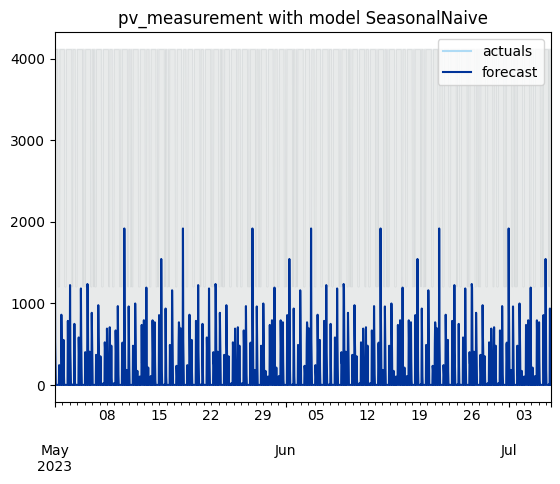

In [34]:
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2023-05-01")

In [35]:
forecasts_df.to_csv(f'precictions_{location}_{version}.csv')

In [36]:
print(model.model_list)

{'ConstantNaive': 1, 'LastValueNaive': 1.5, 'AverageValueNaive': 1, 'GLS': 1, 'SeasonalNaive': 1, 'GLM': 1, 'ETS': 1, 'VAR': 0.8, 'VECM': 1, 'WindowRegression': 0.5, 'DatepartRegression': 0.8, 'UnivariateMotif': 1, 'MultivariateMotif': 0.8, 'SectionalMotif': 1, 'NVAR': 1, 'MAR': 1, 'RRVAR': 1, 'KalmanStateSpace': 1, 'MetricMotif': 1, 'Cassandra': 1, 'SeasonalityMotif': 1}


NameError: name 'model_params' is not defined